## Problem Statment:

### Prepare a prediction model for the profit of 50_startups data.
### Do transformations for getting better predictions of profit 
### Creating a table containing Rsquared value for each prepared model.


### Import libraries

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

from ml_metrics import rmse

import warnings
warnings.filterwarnings('ignore')

### Reading the csv file

In [2]:
startups = pd.read_csv('50_Startups.csv')
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Checking for null values

In [3]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


There is no Null value present in side the data set and also the data types are appopriate in all attributes

### The datatype of the State column is an object with categorical data. Moreover, it doesn't contribute to teh prediction and thus, it's better to remove that column from the data set

### Dropping the State column

In [4]:
startups1 = startups.drop('State', axis = 1)
startups1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


### Renaming all the columns names without spaces and to a shorter one, for easier access

In [5]:
#Rename the R&D Spend as R&D_S , Administration as Admin and Marketing Spend as MktSpnd
startups2 = startups1.rename({'R&D Spend': 'RDS', 'Administration': 'Admin', 'Marketing Spend': 'MktSpnd'}, axis=1)
startups2.head()

,RDS,Admin,MktSpnd,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


### Checking and Dropping duplicate values

In [6]:
startups2[startups2.duplicated(keep = False)]

,RDS,Admin,MktSpnd,Profit


### Checking for Outliers, with histogram and boxplot in the R&D column

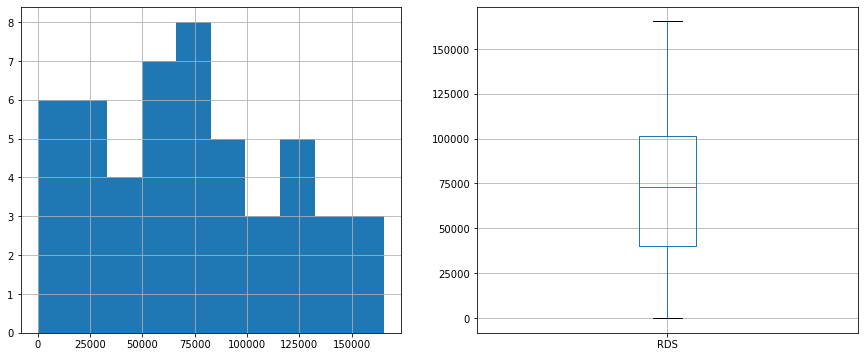

In [7]:
#check whether outliers are present in R&D_S column
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
startups2['RDS'].hist()
plt.subplot(1,2,2)
startups2.boxplot(column=['RDS'])

plt.show()

### Checking for Outliers, with histogram and boxplot in the Admin column

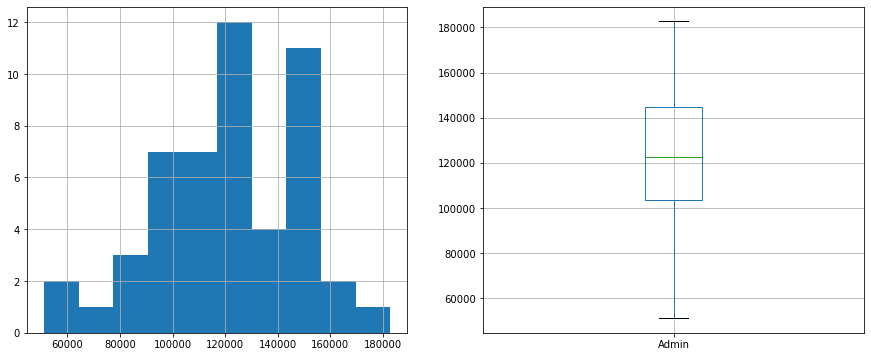

In [9]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
startups2['Admin'].hist()
plt.subplot(1,2,2)
startups2.boxplot(column=['Admin'])

plt.show()

### Checking for Outliers, with histogram and boxplot in the Marketing spend column

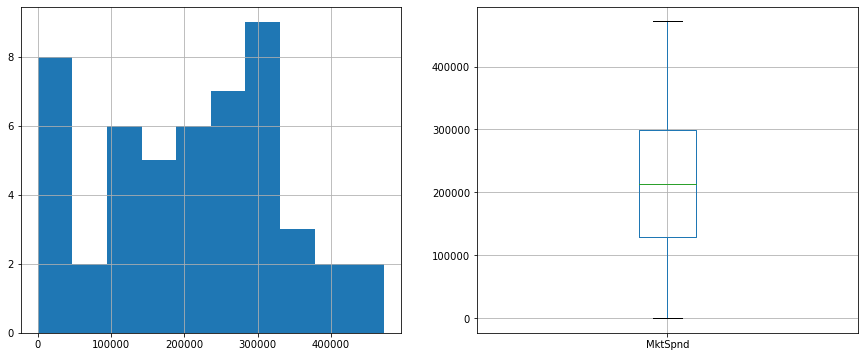

In [10]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
startups2['MktSpnd'].hist()
plt.subplot(1,2,2)
startups2.boxplot(column=['MktSpnd'])

plt.show()

### Checking for Outliers, with histogram and boxplot in the Profit column

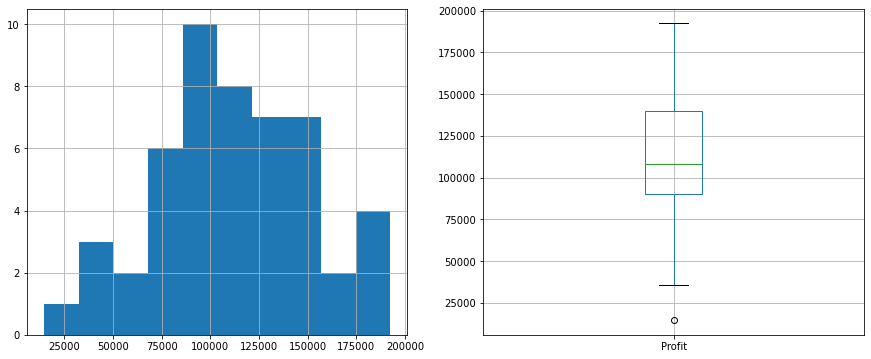

In [11]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
startups2['Profit'].hist()
plt.subplot(1,2,2)
startups2.boxplot(column=['Profit'])

plt.show()

### Checking if the data is normally distributed, using distplot

<AxesSubplot:xlabel='Profit', ylabel='Density'>

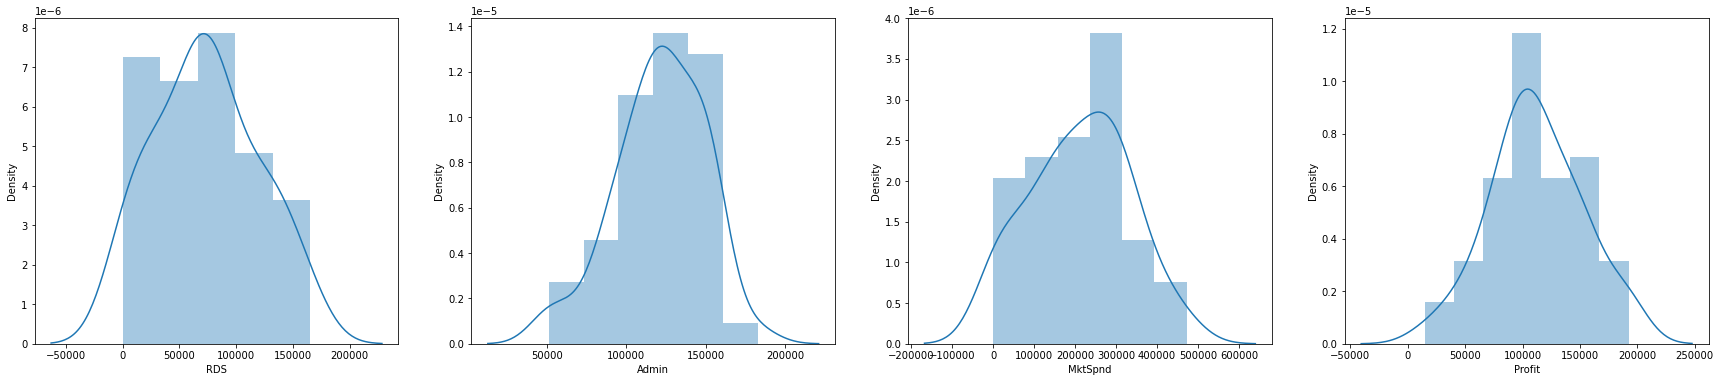

In [12]:
plt.figure(figsize = (30,6))
plt.subplot(1,4,1)
sns.distplot(startups2['RDS'])
plt.subplot(1,4,2)
sns.distplot(startups2['Admin'])
plt.subplot(1,4,3)
sns.distplot(startups2['MktSpnd'])
plt.subplot(1,4,4)
sns.distplot(startups2['Profit'])

### Correlation matrix

In [13]:
startups2.corr()

,RDS,Admin,MktSpnd,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MktSpnd,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### Scatter plot between all variables, using pairplot

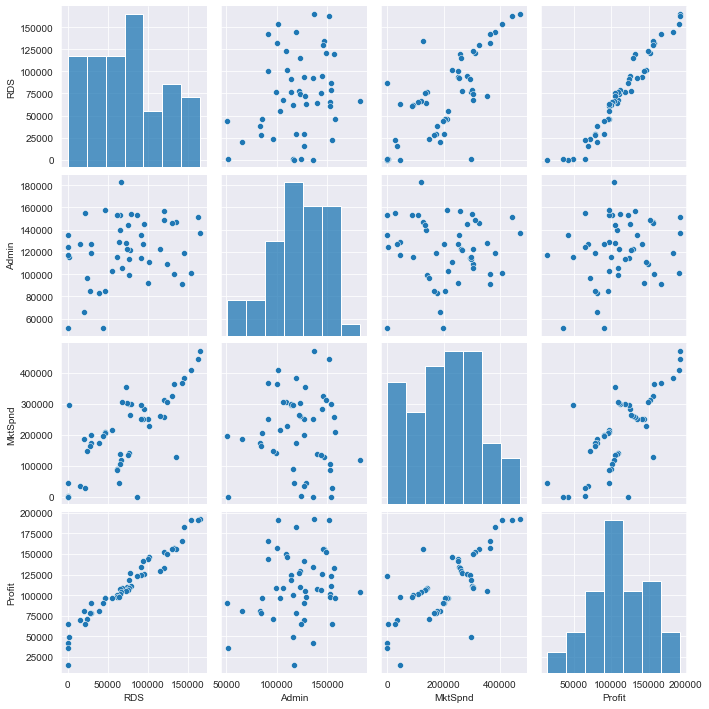

In [22]:
sns.set_style(style='darkgrid')
sns.pairplot(startups2)


## Model 1
### Creating a model to predict profit with better accuracy and low error, without using any transformation

In [14]:
model1 = smf.ols('Profit~RDS+Admin+MktSpnd', data = startups2).fit()

### Coefficients

In [15]:
model1.params

Intercept    50122.192990
RDS              0.805715
Admin           -0.026816
MktSpnd          0.027228
dtype: float64

### T and P-Values

In [16]:
print(model1.tvalues, '\n', model1.pvalues)

Intercept     7.626218
RDS          17.846374
Admin        -0.525507
MktSpnd       1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
Admin        6.017551e-01
MktSpnd      1.047168e-01
dtype: float64


### R-squared and Adj R-squared values

In [17]:
(model1.rsquared,model1.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [20]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 02 Jul 2021   Prob (F-statistic):           4.53e-30
Time:                        10:56:04   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MktSpnd        0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
pred1=model1.predict(startups2)
actual=startups2.Profit
r1=rmse(pred1,actual)
r1

8855.344489015142

## Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

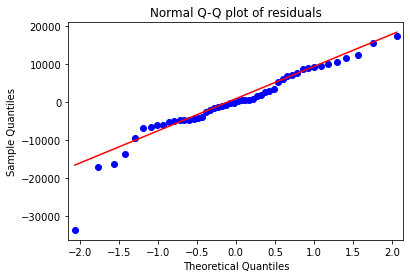

In [18]:
qqplot=sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [36]:
list(np.where(model1.resid<-20000))

[array([49], dtype=int64)]

### Residual plot for homoscedasticity

In [37]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

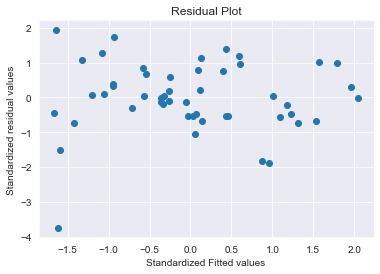

In [38]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Detecting influencers/outliers
## Cook’s Distance

In [21]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

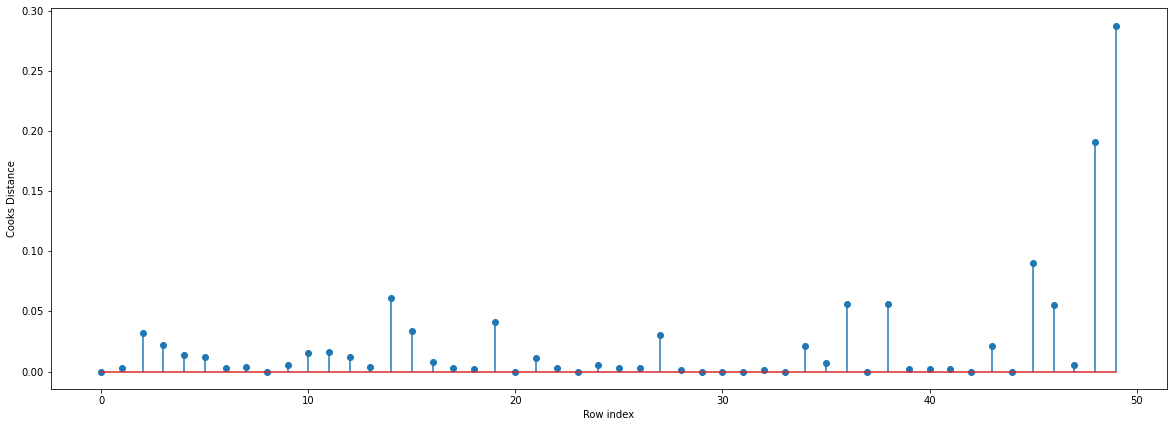

In [22]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [23]:
#index and value of outliers
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

### Using an influence plot, to detect the outlier in the dataset

## Highly influencing points

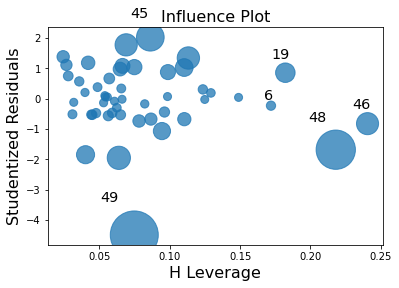

In [24]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [25]:
k = startups2.shape[1]
n = startups2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

### We will remove the data at index 49 from our dataset, since its an outlier

In [26]:
startups2[startups2.index.isin([49])]

,RDS,Admin,MktSpnd,Profit
49,0.0,116983.8,45173.06,14681.4


In [27]:
startups3=startups2.drop(startups2.index[[49]],axis=0).reset_index()

In [28]:
startups3=startups3.drop(['index'],axis=1)

In [30]:
startups3.head()

,RDS,Admin,MktSpnd,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


## Model 2
### Predicting a new model, after removing the influencer at index 49

In [35]:
model2 = smf.ols('Profit~RDS+Admin+MktSpnd', data = startups3).fit()

### Coefficients

In [36]:
model2.params

Intercept    52382.439251
RDS              0.783002
Admin           -0.022201
MktSpnd          0.025234
dtype: float64

In [37]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 02 Jul 2021   Prob (F-statistic):           8.85e-32
Time:                        11:00:51   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
Admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
MktSpnd        0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
pred2=model2.predict(startups2)
r2=rmse(pred1,actual)
r2

8855.344489015142

## Model 3
### Predicing a model excluding Admin and Marketing spend columns, since their p values are greater than 0.05

In [39]:
model3 = smf.ols('Profit~RDS', data = startups3).fit()

In [40]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Fri, 02 Jul 2021   Prob (F-statistic):           7.56e-34
Time:                        11:02:15   Log-Likelihood:                -508.68
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      47   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.172e+04   2229.914     23.195      0.000    4.72e+04    5.62e+04
RDS            0.8278      0.025     32.477      0.000       0.777       0.879
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking the RMSE value

In [42]:
pred2 = model2.predict(startups3.iloc[:,:3])


In [47]:
actual = startups3.Profit

In [49]:
from ml_metrics import rmse
r3=rmse(pred2,actual)
r3

7430.589093678346

# Table of R-squared value for all model

In [51]:
df = {'Model':['Model1','Model2','Model3'],'R_Squared Value':(model1.rsquared,model2.rsquared,model3.rsquared),
     "RMSE":(r1,r2,r3)
     }

In [52]:
R_Square_Table = pd.DataFrame(df)
R_Square_Table 

,Model,R_Squared Value,RMSE
0,Model1,0.950746,8855.344489
1,Model2,0.961316,8855.344489
2,Model3,0.957340,7430.589094


## Conclusion:

### From all the models, it is evident that the model is higher Rsquared value is mdel 2, with a value of 0.961.
### The RMSE value is lowest in model 3. 
### Thus, Model2 is the best model to predict profit with a better accuracy, since it has the highest rsquared value.